 **• MILEAGE PREDICTION MODEL : REGRESSION ANALYSIS**

**#DATA SOURCE**:The dataset was taken from StateLib library for the Educational purpose only which is maintained at Carnegie Mellon University. Also, the data copyright holder is the above mentioned university.

**#IMPORT LIBRARY**

In [10]:
import pandas as pd

In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

**#IMPORT DATASET**

In [75]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [76]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**#DATA PRE-PROCESSING**

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [78]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [79]:
df = df.dropna()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**#DATA VISUALISATION**

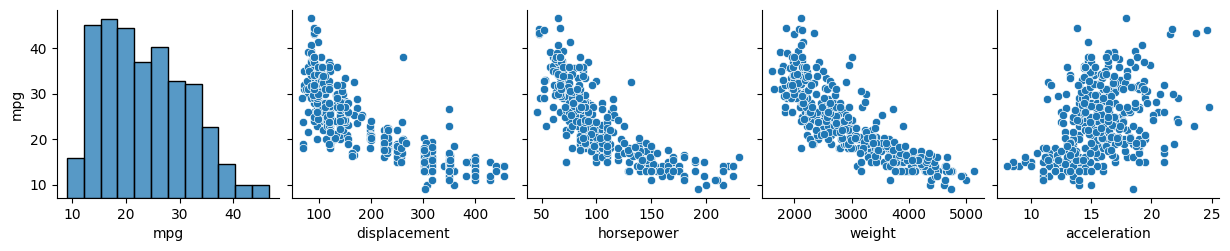

In [81]:
sns.pairplot(df, x_vars = ['mpg', 'displacement', 'horsepower', 'weight','acceleration'] , y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

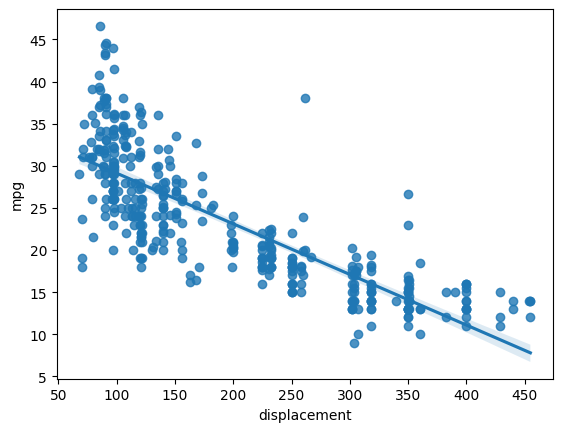

In [82]:
sns.regplot(x='displacement' , y='mpg', data = df)

**#DEFINE TARGET VARIABLE (Y) AND FEATURE (X)**

In [83]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [84]:
y=df['mpg']

In [85]:
y.shape

(392,)

In [86]:
x=df[['displacement', 'horsepower', 'weight','acceleration']]

In [87]:
x.shape

(392, 4)

In [88]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
ss= StandardScaler()

In [91]:
x = ss.fit_transform(x)

In [92]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [93]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00



**#SPLIT DATA INTO TRAIN TEST**

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=2529)

In [96]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((294, 4), (98, 4), (294,), (98,))

**#CHOOSE MODEL: LINEAR REGRESSION MODEL**

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lr=LinearRegression()

In [99]:
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
lr.intercept_

23.464404729340036

In [101]:
lr.coef_

array([-0.82134735, -2.00007128, -4.12715281, -0.16529152])

**Mileage = 23.4-1.05(Displacement)-1.68(Horsepower)-4.10(weight)-0.115(Acceleration)+Error**

**#PREDICT TEST DATA**

In [102]:
y_pred=lr.predict(x_test)

In [103]:
y_pred

array([18.45029029, 15.11872575, 14.25951901, 23.63777162, 29.77227939,
       23.78289678, 26.46274613, 24.63477759, 15.10361067, 11.92089347,
       24.03667612, 28.03774179, 31.7791986 , 31.04942136, 18.34939414,
       19.34562679, 28.14901371, 32.26833498, 31.23336778, 27.1706607 ,
       18.90264044, 22.69158865, 26.30616149, 32.53334114, 20.7455229 ,
        8.43604922, 21.96939005, 18.16644283, 24.9187207 , 14.95041612,
       23.27573018, 17.10008397,  9.28416594, 30.02859334, 20.49341373,
       29.16402497, 24.1851619 , 21.82468561, 10.45764414, 12.99758931,
       21.55287965, 19.9763373 ,  5.81701795, 17.83479167, 22.69872144,
       29.39987303, 13.2638446 , 25.84303202, 29.29886179, 22.44116443,
       22.30857618, 16.57432268, 24.06827363, 30.19019859, 10.04817173,
        9.3533171 , 28.14495274, 23.67665202, 20.07936568, 30.77322956,
       20.95405256, 26.72684739, 23.16157669, 14.10789682, 24.37223149,
       26.84731155, 15.26437637, 24.21355   , 30.81705563, 14.86

**#CHECK MODEL ACCURACY**

In [104]:
from sklearn.metrics import mean_absolute_percentage_error

In [105]:
error_percentage=mean_absolute_percentage_error(y_test,y_pred)*100

In [106]:
print("Accuracy % : ",(100-error_percentage))

Accuracy % :  85.51385478337191


**#MODEL(2): POLYNOMIAL REGRESSION**

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [108]:
poly=PolynomialFeatures(degree=2,interaction_only=True, include_bias=False)

In [109]:
X_train2 = poly.fit_transform(x_train)

In [110]:
X_test2 = poly.fit_transform(x_test)

In [111]:
lr.fit(X_train2,y_train)

LinearRegression()

In [112]:
lr.intercept_

21.295474126506168

In [113]:
lr.coef_

array([-2.78636354, -5.39053361, -1.15797282, -1.14970885,  1.35645181,
       -0.16432177, -0.03040911,  1.09523004, -0.67580641,  0.78299062])

In [114]:
y_pred_poly = lr.predict(X_test2)

**#MODEL(2) ACCURACY**

In [115]:
from sklearn.metrics import mean_absolute_percentage_error

In [116]:
error_per = mean_absolute_percentage_error(y_test,y_pred_poly)*100

In [117]:
print("Accuracy % : ",(100-error_per))

Accuracy % :  88.70783067834776
